# Interpolacion de Lagrange 
La interpolación de Lagrange es un método para encontrar un polinomio que pasa exactamente por un conjunto de puntos dados.

* Dado un conjunto de puntos (x_0, y_0), (x_1, y_1), ..., (x_n, y_n), el polinomio interpolante de Lagrange L(x) se define como:

## L(x) = y_0 * l_0(x) + y_1 * l_1(x) + ... + y_n * l_n(x)

* donde cada l_i(x) es un polinomio de Lagrange base y se calcula como:

## l_i(x) = Π_{j ≠ i} (x - x_j) / (x_i - x_j)

* Esto significa que para cada punto de datos (x_i, y_i), calculamos un polinomio l_i(x) que es 1 en x_i y 0 en todos los demás puntos x_j. Luego, sumamos estos polinomios ponderados por los valores y_i correspondientes para obtener el polinomio interpolante final.

* Este polinomio resultante L(x) es de grado n y pasa exactamente por los n+1 puntos de datos dados.

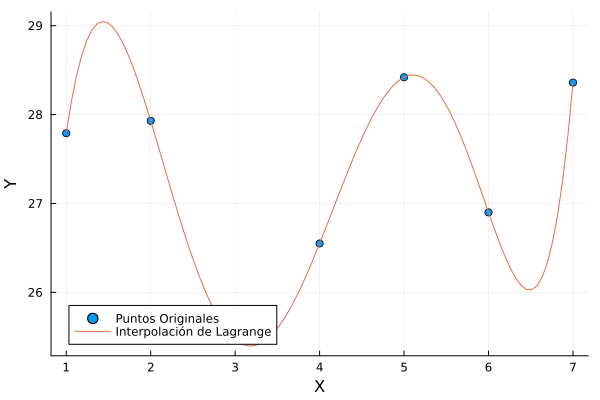

In [15]:
using Plots

ruta = "Datos.csv"
datos_str = read(ruta, String)
datos_substrings = split(datos_str, ",")
datos_xi = [1,2,3,4,5,6,7] 
datos_yi = parse.(Float64, datos_substrings)

# Definir la función de interpolación de Lagrange
function interpolacion_lagrange(datos_xi, datos_yi, x)
    n = length(datos_xi)
    suma = 0
    for i in 1:n
        producto = datos_yi[i]
        for j in 1:n
            if i != j
                producto *= (x - datos_xi[j]) / (datos_xi[i] - datos_xi[j])
            end
        end
        suma += producto
    end
    return suma
end

x_interpolados = sort(vcat(datos_xi, range(minimum(datos_xi), stop=maximum(datos_xi), length=100)))
y_interpolados = [interpolacion_lagrange(datos_xi, datos_yi, x) for x in x_interpolados]

scatter(datos_xi, datos_yi, label="Puntos Originales")
plot!(x_interpolados, y_interpolados, label="Interpolación de Lagrange", xlabel="X", ylabel="Y")